In [2]:
import numpy as np
import math

### Arrays

In [4]:
a = np.array([1, 2, 3])
a
print(a.ndim)

1


In [7]:
# Create a matrix
b = np.array([[1, 2, 3], [4, 5, 6]])
b

array([[1, 2, 3],
       [4, 5, 6]])

In [8]:
# To look at the shape and type using the following
print(b.shape)
print(b.dtype)

(2, 3)
int64


In [13]:
# Besides, integers, floats are also accepted
c = np.array([2.2, 5, 1.1])

In [14]:
c.dtype.name

'float64'

In [15]:
# Numpy will automatically convert integers to floats
c

array([2.2, 5. , 1.1])

In [19]:
d = np.zeros((2, 3))
e = np.ones((2, 3))

print(d, e)

[[0. 0. 0.]
 [0. 0. 0.]] [[1. 1. 1.]
 [1. 1. 1.]]


In [23]:
# Create an array of even numbers from 10 to 50
evens = np.arange(10, 50, 2)
evens

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48])

In [24]:
# To geenrate sequence of floats, use the linspace command
np.linspace(0, 2, 15) # 15 numbers from 0 (inclusive) to 2 (inclusive)


array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        , 1.14285714, 1.28571429,
       1.42857143, 1.57142857, 1.71428571, 1.85714286, 2.        ])

### Array Operations

In [29]:
# Arithmetic operations
a = np.arange(10, 41, 10)
b = np.arange(1, 5)

In [31]:
c = a - b
print(c)

d = a*b
print(d)

[ 9 18 27 36]
[ 10  40  90 160]


In [34]:
# Conversion of celcius to temperatures
far_deg = np.array([0, -10, -5, -15, 0])

# Conversion to C is ((F - 32) * 5/9)
celcius = (far_deg -32) * (5/9)
print(far_deg, celcius)

[  0 -10  -5 -15   0] [-17.77777778 -23.33333333 -20.55555556 -26.11111111 -17.77777778]


In [35]:
celcius > -20

array([ True, False, False, False,  True])

In [36]:
# Check if numbers are even
celcius%2 == 0

array([False, False, False, False, False])

In [38]:
# Matrix product
A = np.array([[1, 1], [0, 1]])
B = np.array([[2, 0], [3, 4]])
print(A * B)

# Matrix product needs the @ sign (Dot product)
print(A @ B)

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]


In [40]:
print(A.shape, B.shape)

(2, 2) (2, 2)


(2, 2)

In [44]:
# Upcoasting
# Integers are whole numbers only, floats can have an integer portion and a decimal portion

array1 = np.array([[1, 2, 3], [4, 5, 6]])
array2 = np.array([[7.1, 8.2, 9.1], [10.4, 11.2, 12.3]])
print(f'{array1.dtype} and {array2.dtype}')

array3 = array1 + array2
print(f'{array3}\nand the type:{array3.dtype}')

int64 and float64
[[ 8.1 10.2 12.1]
 [14.4 16.2 18.3]]
and the type:float64


In [45]:
# Create a 3 X 5 array from 1 to 15
b = np.arange(1, 16, 1).reshape(3, 5)
print(b)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]


### READ IN AN IMAGE

['HotelCustomersDataset.xlsx', 'Yahoo Price.pkl', 'car_prices.csv', 'Chriss.tiff', 'coffee', 'Diamonds Prices2022.csv', 'Yahoo Volume.pkl', 'housing_data.csv']


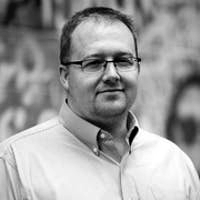

In [57]:
from PIL import Image
from IPython.display import display

# Check where image is
import os
print(os.listdir("../Data"))

# And let's just look at the image
im = Image.open("../Data/Chriss.tiff")
display(im)

In [58]:
# We can conver the PIL image to a numpy array
array = np.array(im)
print(array.shape)
array

(200, 200)


array([[118, 117, 118, ..., 103, 107, 110],
       [113, 113, 113, ..., 100, 103, 106],
       [108, 108, 107, ...,  95,  98, 102],
       ...,
       [177, 181, 182, ..., 193, 198, 192],
       [178, 182, 183, ..., 193, 201, 189],
       [178, 182, 184, ..., 193, 201, 187]], shape=(200, 200), dtype=uint8)

In [62]:
# The array is 200 x 200 and we have values that are all uint8. The uint that they are unsiged integers, and the 8 means they are 8 bits per byte. Each value can be up to 2**8 (so 255 values), 
# So let's convert the image to black and white using a numpy array

mask = np.full(array.shape, 255) # Use the shape of the array object, but fill it with 255
mask


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(200, 200))

In [66]:
# Subtract that from the modified array
modified_array = array - mask
modified_array = modified_array * -1 # convert all the negative values to positive

# Reset the data type
modified_array = modified_array.astype(np.uint8)

# 
modified_array


array([[137, 138, 137, ..., 152, 148, 145],
       [142, 142, 142, ..., 155, 152, 149],
       [147, 147, 148, ..., 160, 157, 153],
       ...,
       [ 78,  74,  73, ...,  62,  57,  63],
       [ 77,  73,  72, ...,  62,  54,  66],
       [ 77,  73,  71, ...,  62,  54,  68]], shape=(200, 200), dtype=uint8)

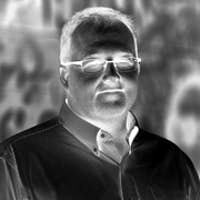

In [67]:
# To render this as an image, we can uase the fromarray() function in the python imaging library to convert the numpy array into an object jupyter can render
display(Image.fromarray(modified_array))

(100, 400)


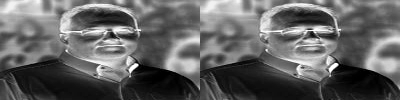

In [77]:
# What happens if we take that modified array and reshape it to a 100 x 400 array? and then look at it?
reshaped = np.reshape(modified_array, (100, 400)) # BASICALLY, TAKING every other line and stacking them out in width
print(reshaped.shape)
display(Image.fromarray(reshaped))

### Indexing, slicing and iterating

In [80]:
# Integer indexing
a = np.array([1, 3, 5, 7])
a[2]

np.int64(5)

In [83]:
a = np.array([[1, 2], [3, 4], [5, 6]])
print(a)
a[1, 1]

[[1 2]
 [3 4]
 [5 6]]


np.int64(4)

In [84]:
# Can extract values with entered indices or we can "zip them up"
# This should yield [1, 4, 6]
print(a[[0, 1, 2], [0, 1, 1]])

[1 4 6]


### Boolean indexing

In [85]:
print(a > 5)

[[False False]
 [False False]
 [False  True]]


In [87]:
#Now, use this boolean indexing in a mask to filter the original array to get an n-dimension array of only those values for which this is true
print(a[a>5])

[6]


In [91]:
# Can slice arrays
a = np.arange(0, 6)
print(a)
a[:3]

# Let's get just the last 3 elements
a[-3:]

[0 1 2 3 4 5]


array([3, 4, 5])